In [2]:
import pandas as pd
titanic = pd.read_csv(r'E:\work\ML_prac\Data\titanic\Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ✅데이터 구조 파악

In [ ]:
titanic.info() # 기본적인 구조 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe() # 숫자형 데이터에 대한 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### ✅데이터 시각화 기반 EDA

<Axes: xlabel='Survived', ylabel='count'>

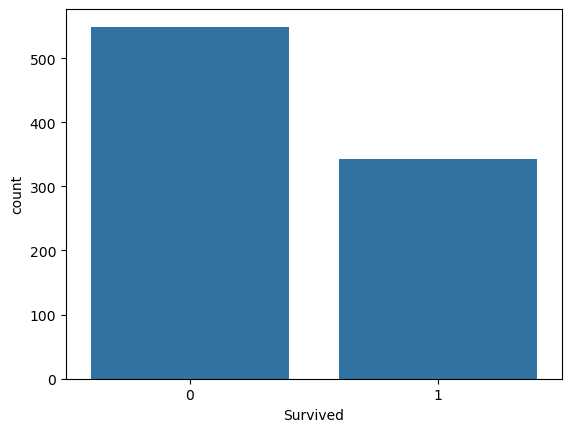

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=titanic) # 생존자 비율

<Axes: xlabel='Sex', ylabel='count'>

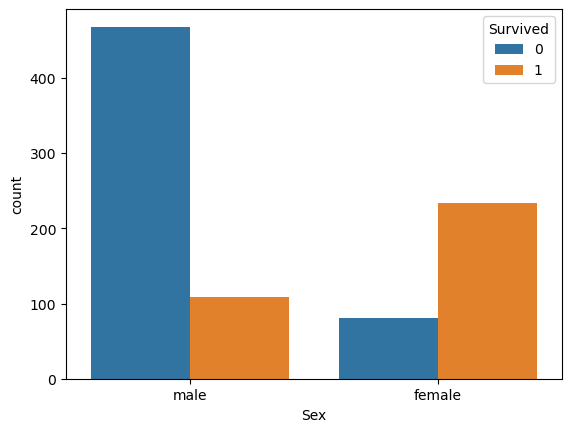

In [ ]:
sns.countplot(x = 'Sex',hue='Survived',data=titanic) # 성별별 생존률존률

<Axes: xlabel='Pclass', ylabel='count'>

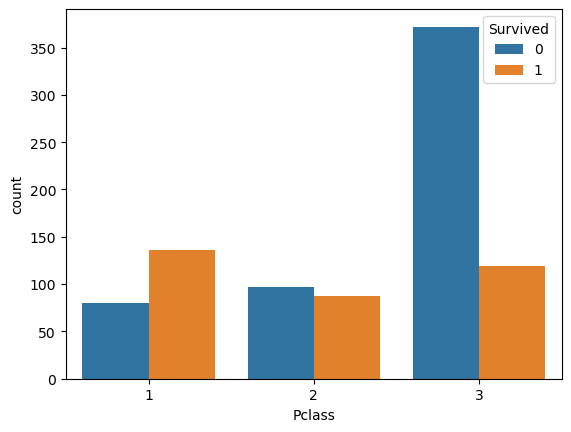

In [9]:
sns.countplot(x='Pclass',hue='Survived',data=titanic) # 등급별 생존률

<Axes: xlabel='Survived', ylabel='Age'>

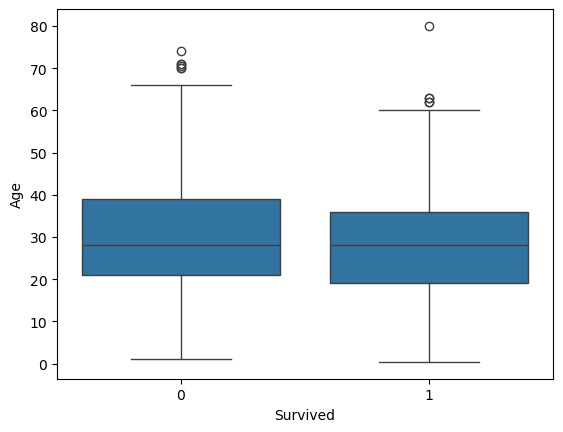

In [ ]:
sns.boxplot(x = 'Survived',y = 'Age', data = titanic) # 나이와 생존 관계

### ✅상관관계 분석

<Axes: >

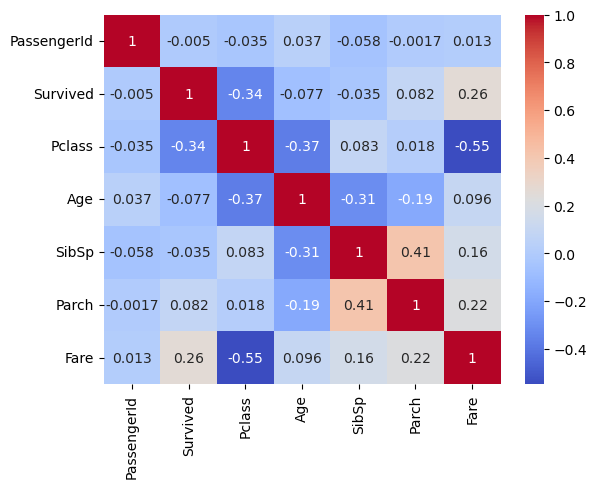

In [13]:
# 수치형(numeric collumn) 간의 상관계수
titanic.corr(numeric_only=True)
# annot : 칸에 수치값도 포함, cmap : 색상
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')

### ✅결측치 처리

In [ ]:
titanic.isnull().sum() #Age, Cabin, Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age

In [35]:
titanic['Age'].fillna(int(titanic['Age'].mean()),inplace = True) # 평균값으로 계산

#### Embarked

In [ ]:
titanic.dropna(subset=['Embarked'], inplace=True) # 결측치가 2개밖에 없어서 걍 지워도됨됨

#### Cabin

In [ ]:
titanic.isnull().sum() # 결측치가 개많음음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
titanic.drop('Cabin', axis = 1, inplace = True) # 결측치가 너무 많으니 그냥 열 삭제제

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### ✅ 범주형 변수 인코딩
- Sex (male, female)
- Name 삭제
- Ticket 삭제
- Embarked (S, C, Q)

In [49]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female' : 1}) # 정수 인코딩(이진 데이터는 상관없음)
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True) # 원핫 인코딩

In [52]:
titanic.drop(['Ticket','Name'], axis=1, inplace=True)

In [57]:
titanic[['Embarked_Q','Embarked_S']] = titanic[['Embarked_Q','Embarked_S']].astype(int)

In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked_Q   889 non-null    int32  
 9   Embarked_S   889 non-null    int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 69.5 KB


### ✅데이터 분리

In [59]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [60]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0,1
887,888,1,1,19.0,0,0,30.0000,0,1
888,889,3,1,29.0,1,2,23.4500,0,1
889,890,1,0,26.0,0,0,30.0000,0,0


In [61]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 9)
(178, 9)
(711,)
(178,)


### ✅ 모델 학습 및 평가

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,mean_squared_error,mean_absolute_error,accuracy_score,recall_score,precision_score
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred) # 사실 회귀문제가 아니라 별로
mae = mean_absolute_error(y_test,y_pred) # 사실 회귀문제가 아니라 별로
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'f1 : {f1}')
print(f'accuracy : {accuracy}')
print(f'recall : {recall}')
print(f'precision : {precision}')



mse : 0.20786516853932585
mae : 0.20786516853932585
f1 : 0.7338129496402879
accuracy : 0.7921348314606742
recall : 0.7391304347826086
precision : 0.7285714285714285


c:\Users\User\anaconda3\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ✅confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[90 19]
 [18 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



# 다른 모델 적용

### 🌳 RandomForestClassifier(랜덤 포레스트)
#### n_estimators, max_depth, min_samples_split 등 튜닝 가능

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7808988764044944


### 🌳DecisionTreeClassifier
- max_depth: 최대 트리 깊이 제한
- min_samples_split: 내부 노드를 분할하는 데 필요한 최소 샘플 수
- criterion: 정보 이득 기준 (gini, entropy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.7359550561797753


### 🌱 GradientBoostingClassifier
- n_estimators: 약한 학습기의 개수
- learning_rate: 각 트리의 기여 비율 (작을수록 성능 안정적)
- max_depth: 각 트리의 최대 깊이

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.8089887640449438


## 앙상블 기법

In [75]:
from sklearn.ensemble import VotingClassifier

# 앙상블 모델 (하드 투표: 다수결)
voting = VotingClassifier(
    estimators=[('lr', model), ('rf', rf), ('gb', gb)],
    voting='hard'  # 'soft'는 predict_proba 필요 (확률 평균)
)

# 학습
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)

# 평가
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))

c:\Users\User\anaconda3\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.8033707865168539
